# Импорт данных и предварительный анализ

In [58]:
# Импорт данных и выбор стиля графиков
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn-v0_8')

df = pd.read_csv("https://raw.githubusercontent.com/vvwsL/VK.Analyst_AE/main/video_sessions_transformed.csv")

In [59]:
# Основная информация
display(df.info())
display(df.describe(include='all'))
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          4503 non-null   int64 
 1   video_owner_id   4503 non-null   int64 
 2   total_view_time  4503 non-null   int64 
 3   vk_platform      4503 non-null   object
 4   nav_screen       4503 non-null   object
 5   video_id         4503 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 211.2+ KB


None

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
count,4.503000e+03,4.503000e+03,4.503000e+03,4503,4503,4.503000e+03
unique,NaN,NaN,NaN,3,10,NaN
top,NaN,NaN,NaN,vk_video_android,video_for_you,NaN
freq,NaN,NaN,NaN,3296,2213,NaN
mean,1.233544e+13,1.811593e+11,1.046599e+05,NaN,NaN,1.508005e+12
std,1.076879e+13,2.015803e+11,4.959592e+06,NaN,NaN,1.289130e+11
min,2.085183e+08,-1.122277e+12,-3.000000e+02,NaN,NaN,2.344280e+06
25%,2.248819e+12,1.377161e+11,0.000000e+00,NaN,NaN,1.524752e+12
50%,9.657196e+12,2.542896e+11,0.000000e+00,NaN,NaN,1.524754e+12
75%,2.048263e+13,2.839772e+11,2.000000e+00,NaN,NaN,1.524762e+12


,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662


# Есть ли выбросы?

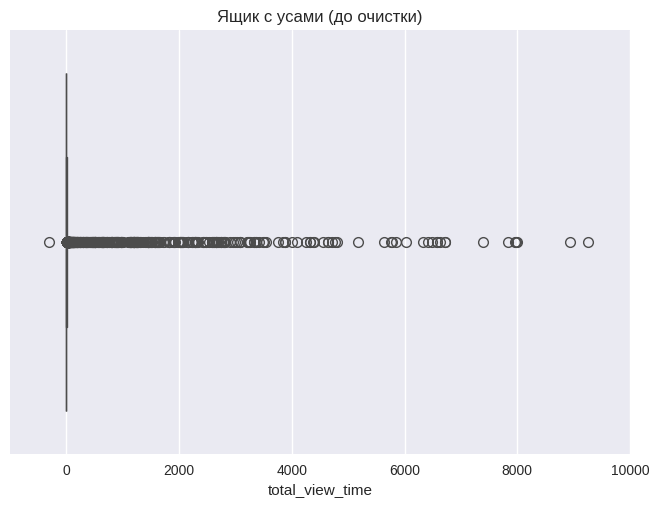

In [60]:
# Ограничим ось X для лучшей читаемости (иначе длинный хвост всё портит)

sns.boxplot(x=df['total_view_time'])
plt.title("Ящик с усами (до очистки)")
plt.xlim(-1000, 10000)
plt.show()

# Очистка дынных от выбросов

In [54]:
# Всего записей в исходных данных
df_uncleaned = df.copy()
print(f"Всего записей в исходных данных: {len(df_uncleaned)}")

# Удаляем записи с нулевым и отрицательным временем просмотра
df_cleaned = df[df['total_view_time'] > 0].copy()
print(f"Записей после удаления записей с нулевым и отрицательным временем просмотра: {len(df_cleaned)}")

# Вычисляем квартильные значения для total_view_time
Q1 = df_cleaned['total_view_time'].quantile(0.25)
Q3 = df_cleaned['total_view_time'].quantile(0.75)
IQR = Q3 - Q1

# Определяем нижнюю и верхнюю границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница для выбросов: {lower_bound}")
print(f"Верхняя граница для выбросов: {upper_bound}")

# Фильтруем данные по границам IQR
df_cleaned = df_cleaned[(df_cleaned['total_view_time'] >= lower_bound) &
                        (df_cleaned['total_view_time'] <= upper_bound)].copy()

print(f"Записей после удаления выбросов: {len(df_cleaned)}")

Всего записей в исходных данных: 4503
Записей после удаления записей с нулевым и отрицательным временем просмотра: 1952
Нижняя граница для выбросов: -18.5
Верхняя граница для выбросов: 33.5
Записей после удаления выбросов: 1562


# Осознанные просмотры

In [56]:
# Осознанный просмотр — total_view_time >= 30 секунд
df_conscious = df_cleaned[df_cleaned['total_view_time'] >= 30].copy()

# Считаем количество осознанных просмотров по платформам
conscious_views_by_platform = df_conscious.groupby('vk_platform')['total_view_time'].count().sort_values(ascending=False)

print("Количество осознанных просмотров по платформам (total_view_time >= 30):")
print(conscious_views_by_platform)

Количество осознанных просмотров по платформам (total_view_time >= 30):
vk_platform
vk_video_ios        6
vk_video_android    3
Name: total_view_time, dtype: int64


# Топ 10 сообществ по total_view_time после очистки выбросов



Топ-10 сообществ по суммарному времени просмотра:
video_owner_id
279672446984    261
292278366172    216
145819277544    192
278008965440    148
283074246524    147
279942606536     80
283977180100     79
254211670128     78
269668717396     77
214109178444     74
Name: total_view_time, dtype: int64


<ipython-input-68-85f65b66faad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_communities.values, y=top_communities.index, palette='coolwarm')


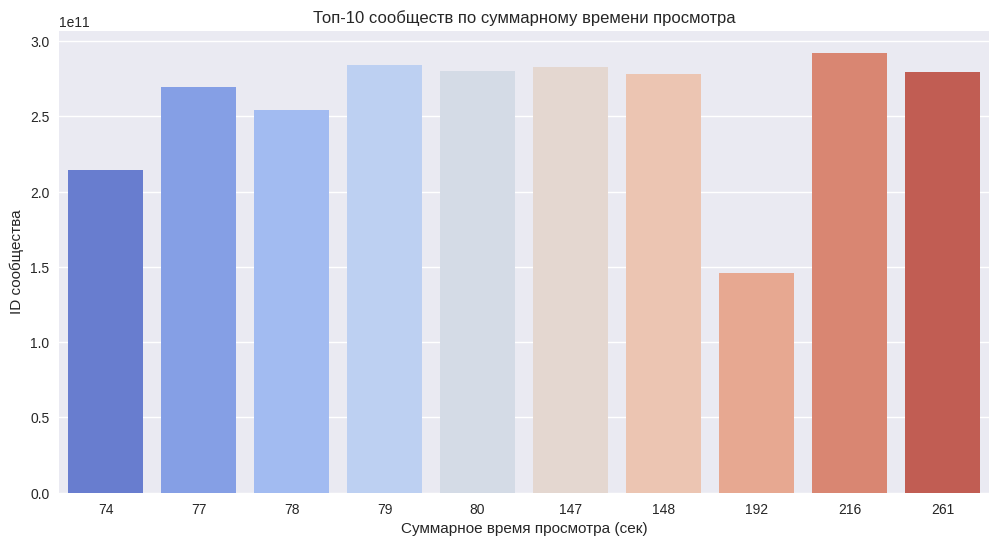

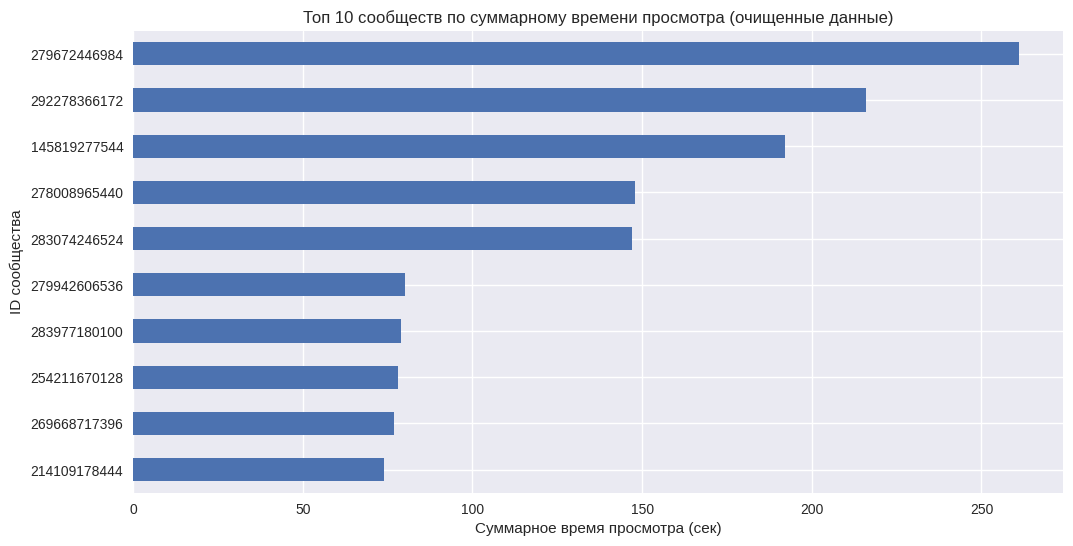

In [68]:
#Топ-10 сообществ по суммарному времени просмотра
top_communities = df_cleaned.groupby('video_owner_id')['total_view_time'].sum().sort_values(ascending=False).head(10)
print("Топ-10 сообществ по суммарному времени просмотра:")
print(top_communities)

# Визуализация. Столбчатые диаграммы
plt.figure(figsize=(12,6))
sns.barplot(x=top_communities.values, y=top_communities.index, palette='coolwarm')
plt.title('Топ-10 сообществ по суммарному времени просмотра')
plt.xlabel('Суммарное время просмотра (сек)')
plt.ylabel('ID сообщества')
plt.show()

# Визуализация. Горизонтальные столбчатые диаграммы
plt.figure(figsize=(12,6))
top_communities.plot(kind='barh')
plt.title('Топ 10 сообществ по суммарному времени просмотра (очищенные данные)')
plt.xlabel('Суммарное время просмотра (сек)')
plt.ylabel('ID сообщества')
plt.gca().invert_yaxis()
plt.show()

# Разница в поведении пользователей по платформам

Статистика по платформам:
                      mean  median  count
vk_platform                              
vk_video_android  4.551131     2.0   1105
vk_video_ios      3.894967     2.0    457

Доля осознанных просмотров по платформам (%):
vk_platform
vk_video_android    0.271493
vk_video_ios        1.312910
Name: conscious_view, dtype: float64


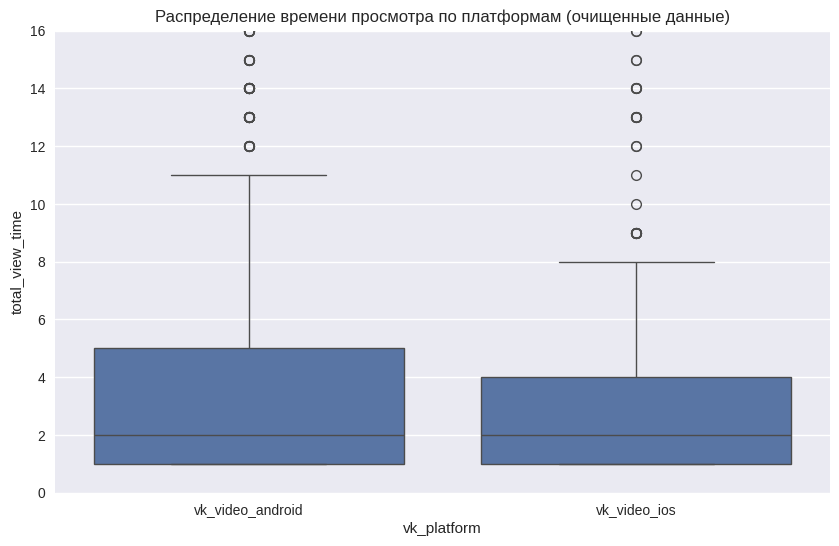

In [66]:
# Среднее и медианное время просмотра по платформам
platform_stats = df_cleaned.groupby('vk_platform')['total_view_time'].agg(['mean', 'median', 'count'])
print("Статистика по платформам:")
print(platform_stats)

# Доля осознанных просмотров (>=30 секунд)
df_cleaned['conscious_view'] = df_cleaned['total_view_time'] >= 30
platform_conscious = df_cleaned.groupby('vk_platform')['conscious_view'].mean() * 100
print("\nДоля осознанных просмотров по платформам (%):")
print(platform_conscious)

# Визуализация распределения времени просмотра по платформам
plt.figure(figsize=(10,6))
sns.boxplot(x='vk_platform', y='total_view_time', data=df_cleaned)
plt.title('Распределение времени просмотра по платформам (очищенные данные)')
plt.ylim(0, df_cleaned['total_view_time'].quantile(0.95))  # Отсекаем редкие очень длинные просмотры для удобства
plt.show()

# Популярность экранов просмотра (nav_screen)

Суммарное время просмотра по экранам:
nav_screen
video_for_you         3062
video_search          3033
video_group_all        484
video_my_history        76
video_my_added          52
catalog_other           50
video_my_bookmarks      50
video_playlist           2
Name: total_view_time, dtype: int64


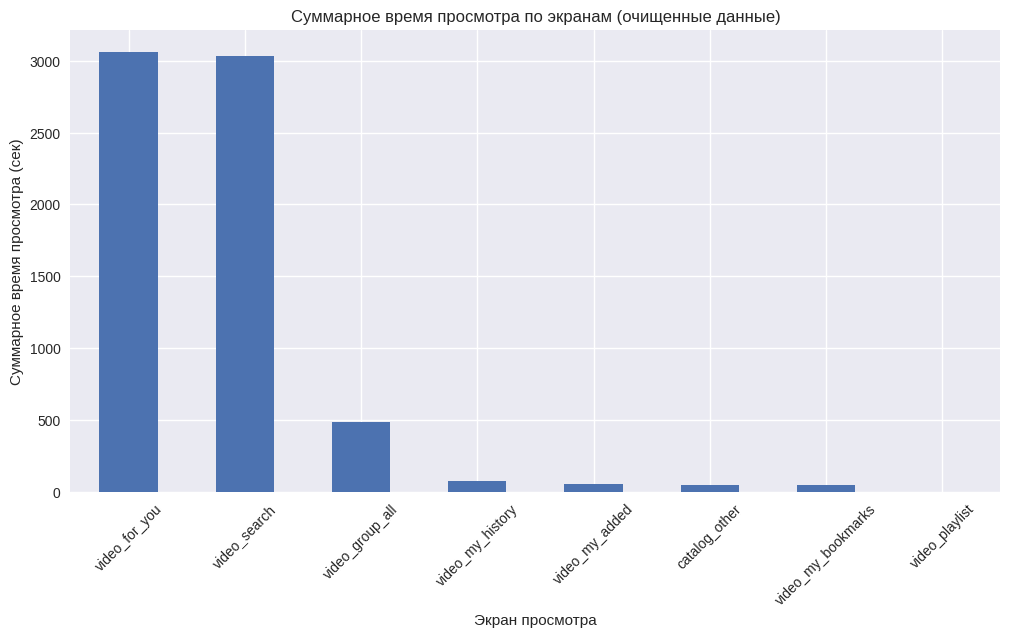

In [64]:
# Суммарное время просмотра по экранам
screen_stats = df_cleaned.groupby('nav_screen')['total_view_time'].sum().sort_values(ascending=False)
print("Суммарное время просмотра по экранам:")
print(screen_stats)

# Визуализация
plt.figure(figsize=(12,6))
screen_stats.plot(kind='bar')
plt.title('Суммарное время просмотра по экранам (очищенные данные)')
plt.ylabel('Суммарное время просмотра (сек)')
plt.xlabel('Экран просмотра')
plt.xticks(rotation=45)
plt.show()

# Повторяющиеся просмотры одного видео пользователем

In [69]:
# Подсчет количества просмотров одного видео пользователем
views_per_user_video = df_cleaned.groupby(['user_id', 'video_id']).size().reset_index(name='view_count')

# Процент пользователей с повторными просмотрами
repeat_viewers = views_per_user_video[views_per_user_video['view_count'] > 1]
percent_repeat = len(repeat_viewers['user_id'].unique()) / len(df_cleaned['user_id'].unique()) * 100
print(f"Процент пользователей с повторными просмотрами: {percent_repeat:.2f}%")

# Среднее время просмотра для повторных просмотров
repeat_view_times = df_cleaned.merge(repeat_viewers, on=['user_id', 'video_id'])
avg_repeat_time = repeat_view_times['total_view_time'].mean()
print(f"Среднее время просмотра при повторных просмотрах: {avg_repeat_time:.2f} сек")

Процент пользователей с повторными просмотрами: 0.20%
Среднее время просмотра при повторных просмотрах: 7.50 сек


Выводы:

1. Выбросы были
2. vk_video_ios имеет больше всего осознанных просмотров
3. Топ-10 сообществ по суммарному времени просмотра:
video_owner_id Суммарное время просмотра
1. Сообщество 279672446984 — время просмотра: 261 сек
2. Сообщество 292278366172 — время просмотра: 216 сек
3. Сообщество 145819277544 — время просмотра: 192 сек
4. Сообщество 278008965440 — время просмотра: 148 сек
5. Сообщество 283074246524 — время просмотра: 147 сек
6. Сообщество 279942606536 — время просмотра: 80 сек
7. Сообщество 283977180100 — время просмотра: 79 сек
8. Сообщество 254211670128 — время просмотра: 78 сек
9. Сообщество 269668717396 — время просмотра: 77 сек
10. Сообщество 214109178444 — время просмотра: 74 сек

4.1. Как можно заметить на соотвутесвующем графике пользователи vk_video_android смотрят видео в среднем в два раза больше

4.2. Самые популярные параметры для nav_screen это video_for_you, video_search

4.3. Процент пользователей с повторными просмотрами: 0.20%. Среднее время просмотра при повторных просмотрах: 7.50 сек